# Pip Install

In [1]:
!pip install mlxtend --user
!pip install lightgbm --user
!pip install xgboost --user
!pip install plotly --user

     |████████████████████████████████| 1.4 MB 39.9 MB/s            
     |████████████████████████████████| 9.8 MB 114.9 MB/s            
     |████████████████████████████████| 297 kB 118.8 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 2.0 MB 31.3 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 200.3 MB 28 kB/s              B 99.3 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 15.3 MB 30.7 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


# Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy as sp
import math
import seaborn as sn
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import warnings
from sklearn.inspection import permutation_importance
warnings.filterwarnings('ignore')

# Model Performance Metrics

In [2]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

def r2(y, y_pred):
    return 1 - np.sum((y - y_pred)**2)/np.sum((y - np.mean(y))**2)

def mape(y, y_pred):
    return (np.mean(np.divide(np.absolute(np.subtract(y,y_pred)), y))*100)

def errors(y, y_pred):
    return np.absolute(y - y_pred)

# Feature Selection

## Feature Selection Function

In [3]:
def run_feature_importance(dataset):
    #train/test split
    train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(dataset, test_size = 0.2, random_state = 60)

    #x values
    X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
    X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
    standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
    X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)
    power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
    X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)
    X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
    X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

    #y_values
    y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)
    mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()
    y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)
    standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))
    y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)
    power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)
    y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)
    y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)
    y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

    ####Initialize K fold Cross validation
    kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

    #####Grid Space for Lasso, Ridge, ElasticNet
    alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
    alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
    e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
    e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

    ####Model Building
    model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
    models = [linear_model.LinearRegression(), \
                LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                      RidgeCV(alphas = alphas_alt, cv = kfolds), \
                      ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                      SVR(C = 20, epsilon = 0.008, gamma = 0.0003),  \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
              XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                           colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
             ]

    fitted_models = []
    for model in models:
        fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
        feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns
        result = permutation_importance(
            fitted_models[models.index(model)], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
        )
        model_importances = pd.Series(result.importances_mean, index = feature_names)
        fig, ax = plt.subplots(figsize=(10, 6))
        model_importances.plot.bar(yerr = result.importances_std, ax = ax)
        ax.set_title("Feature importances using permutation on full model (" + str(model_names[models.index(model)]) + ')')
        ax.set_ylabel("Mean Accuracy decrease")
        plt.grid()
        fig.tight_layout()
    plt.show()
    return

## Feature Selection 1: Permutation Feature Importance

### Summer (All DY/WY Ratios Considered)

In [5]:
df_summer = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_summer.csv').drop(columns = 'Unnamed: 0')
run_feature_importance(df_summer)

,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_as_Urea_kg_per_Ha,N_as_Nitrate_kg_per_Ha,N_as_Ammonium_kg_per_Ha,P_as_Phosphorus_kg_per_Ha,P_as_P2O5_kg_per_Ha,K_as_Potassium_kg_per_Ha,K_as_K2O_kg_per_Ha
0,14.0,3.690000,7586.243386,170.20,0.00,0.00,0.0,0.0,0.0,0.0
1,20.0,3.380000,7204.924242,179.40,0.00,0.00,0.0,0.0,0.0,90.0
2,18.0,2.681429,11941.555556,0.00,74.25,74.25,0.0,0.0,0.0,0.0
3,17.0,2.681429,10673.777778,0.00,74.25,74.25,0.0,0.0,0.0,0.0
4,25.0,2.316250,6964.509804,187.68,0.00,24.20,0.0,114.4,0.0,120.0
...,...,...,...,...,...,...,...,...,...,...
410,16.0,2.690000,8992.923077,128.80,0.00,24.20,0.0,114.4,0.0,78.0
411,15.0,5.380000,11044.670659,128.80,0.00,24.20,0.0,114.4,0.0,78.0
412,13.0,5.380000,10502.634731,128.80,0.00,24.20,0.0,114.4,0.0,81.0
413,15.0,3.750000,6746.722689,128.80,0.00,24.20,0.0,114.4,0.0,81.0


None


### Winter (All DY/WY Ratios Ratios Considered)

[17:54:38] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


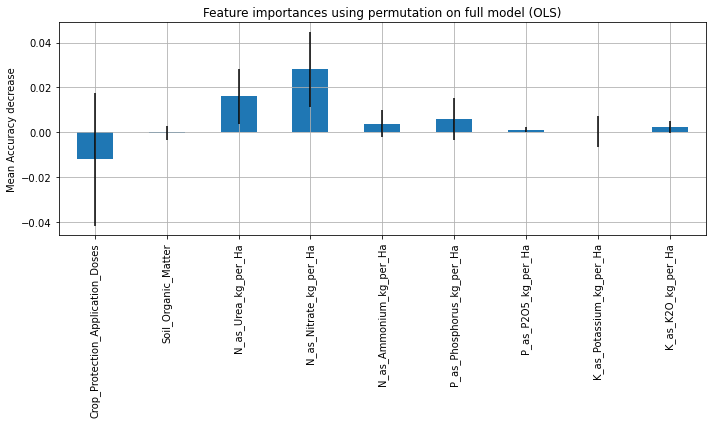

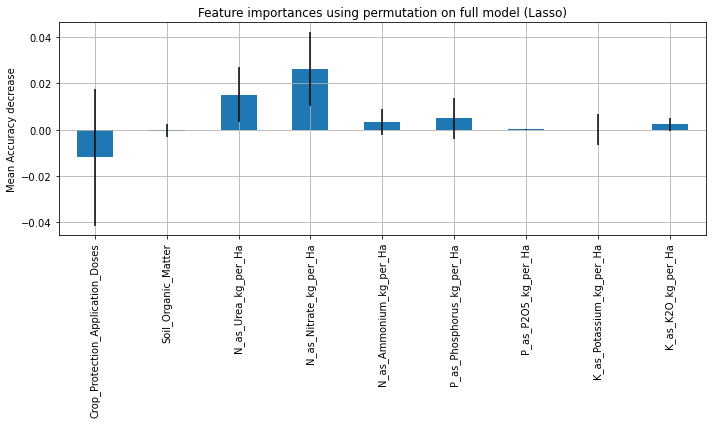

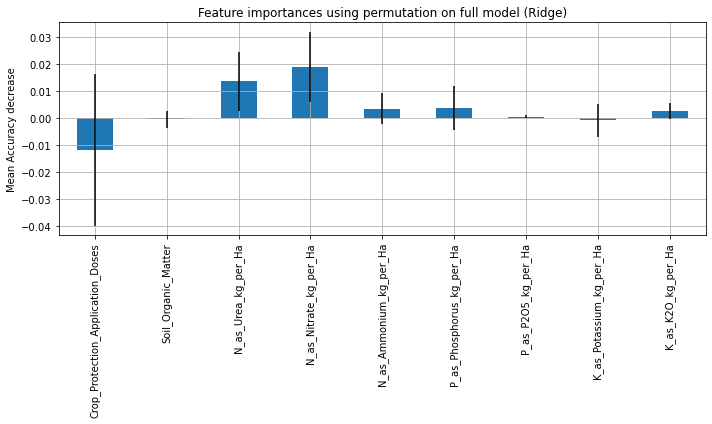

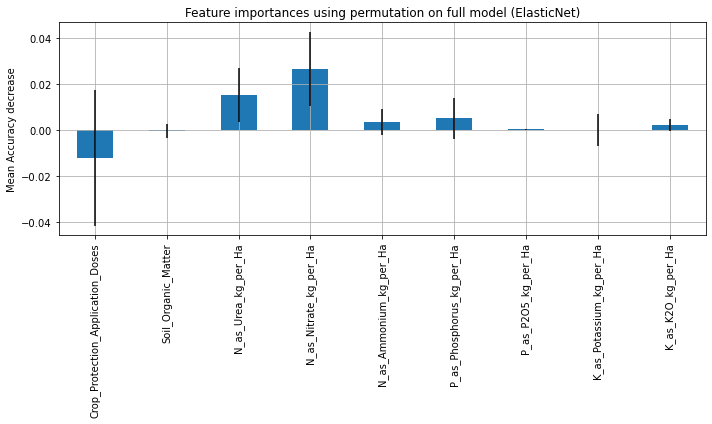

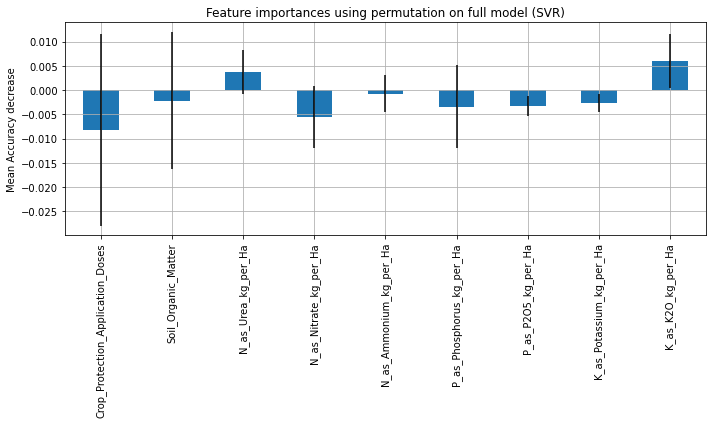

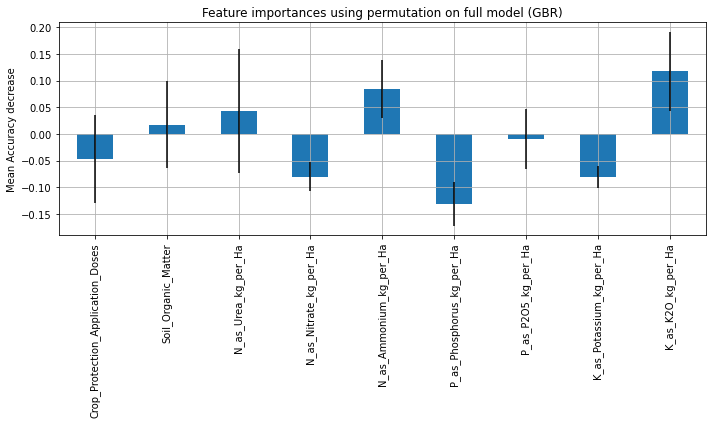

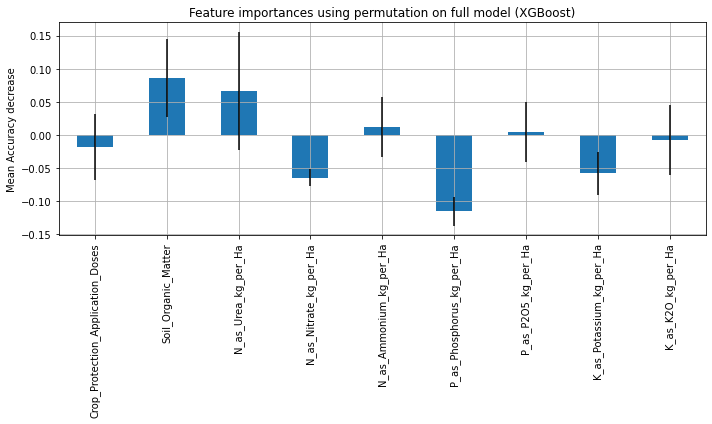

In [35]:
df_winter = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_winter.csv').drop(columns = 'Unnamed: 0')
run_feature_importance(df_winter)

### Summer (within Acceptable Dry/Wet Yield Ratio Range)

[19:09:37] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


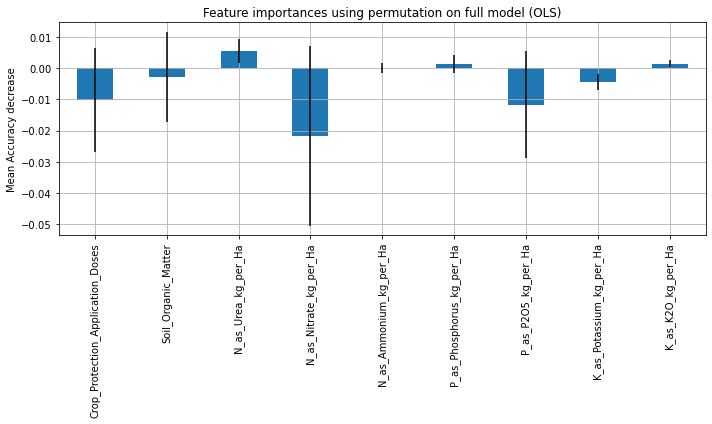

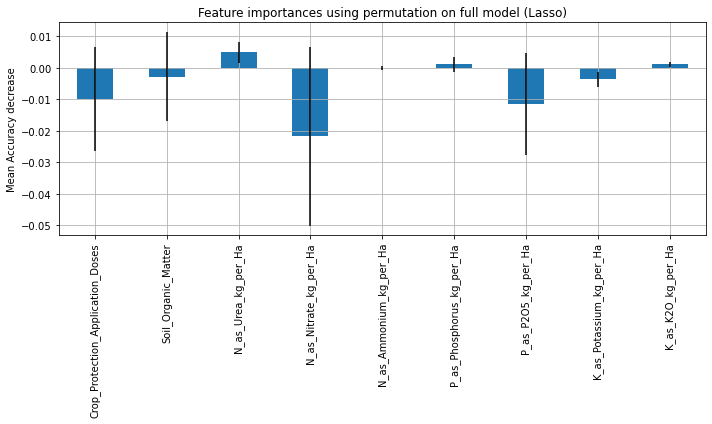

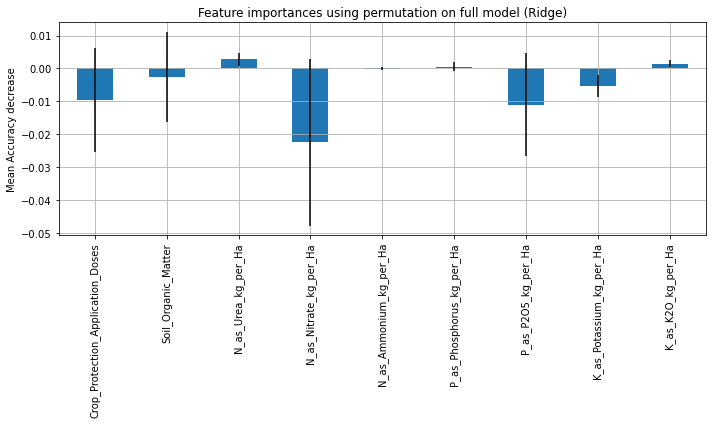

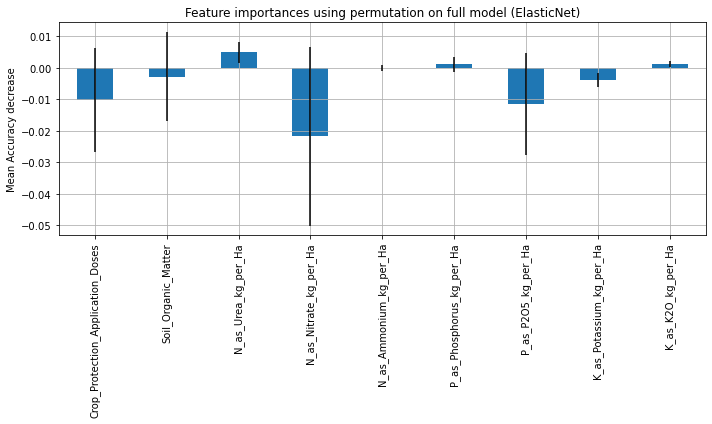

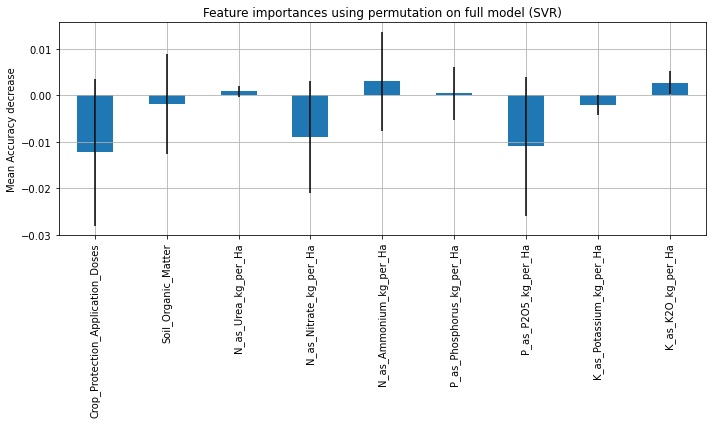

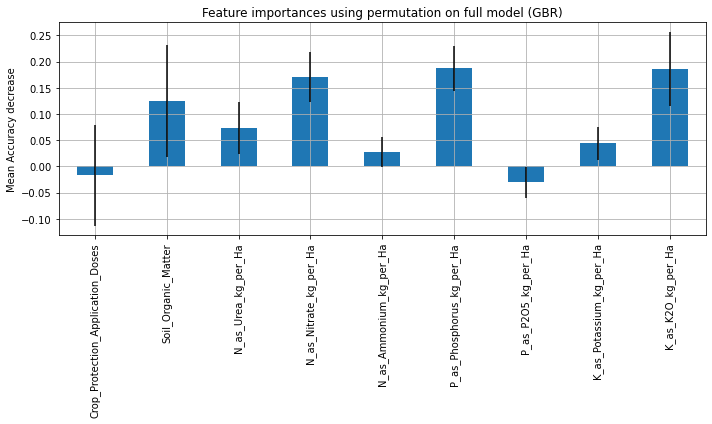

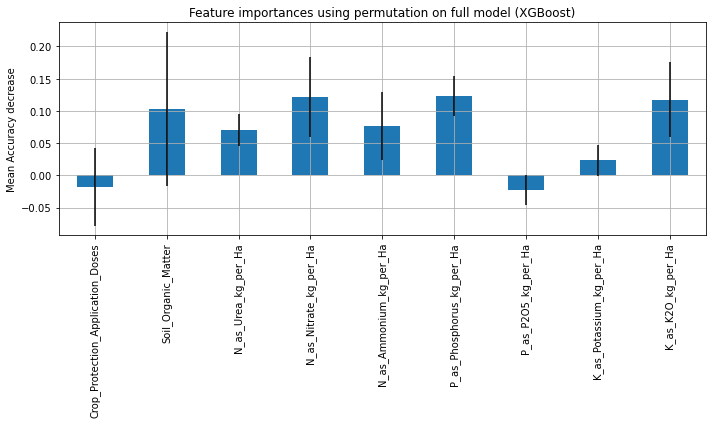

In [45]:
df_dy_wy_ratio_summer = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_dy_wy_ratio_summer.csv').drop(columns = 'Unnamed: 0')
run_feature_importance(df_dy_wy_ratio_summer)

### Winter (within Acceptable Dry/Wet Yield Ratio Range)

[17:55:34] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


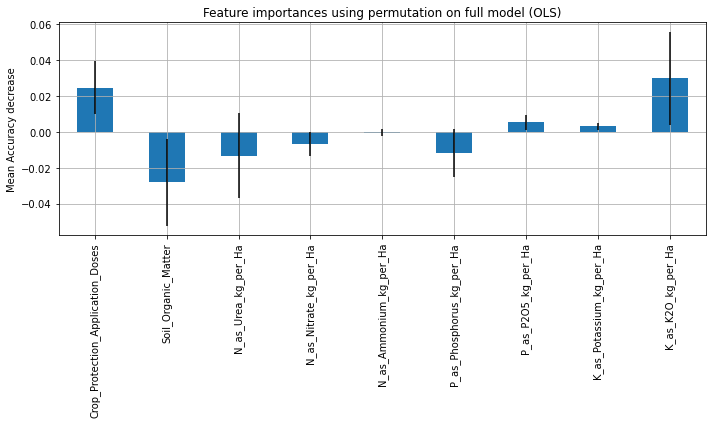

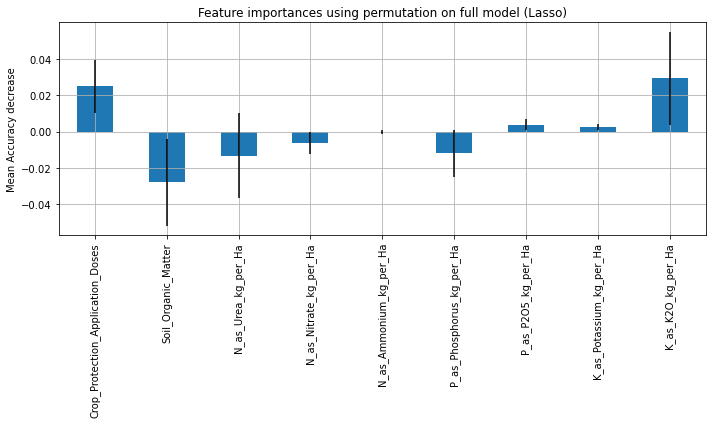

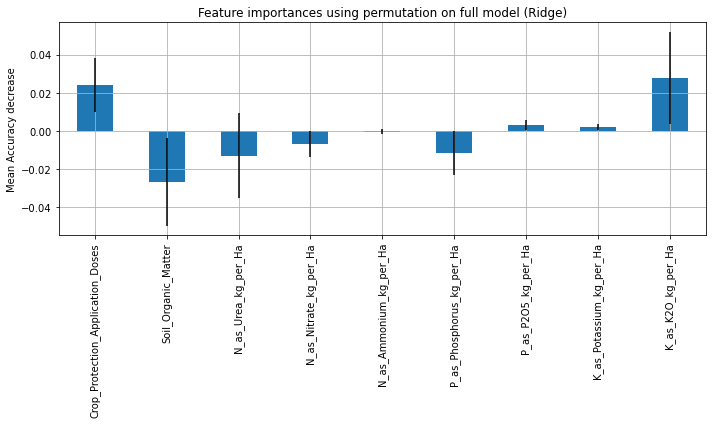

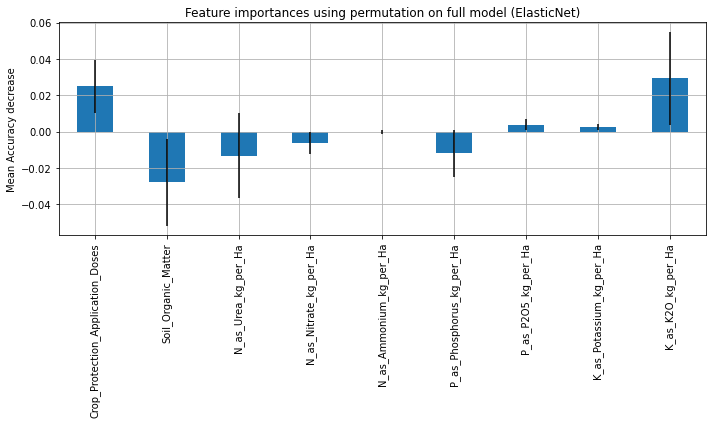

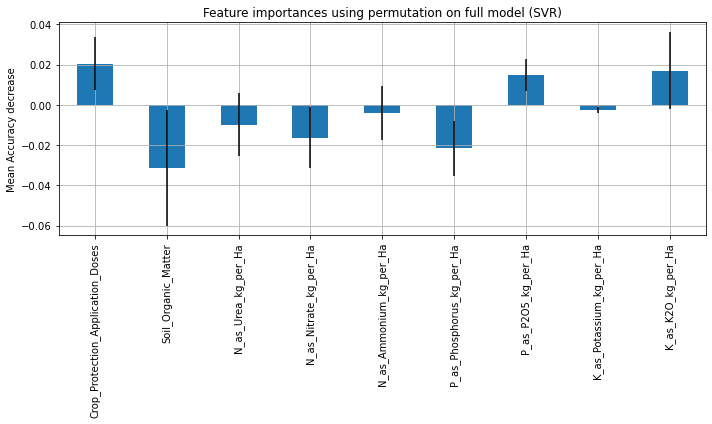

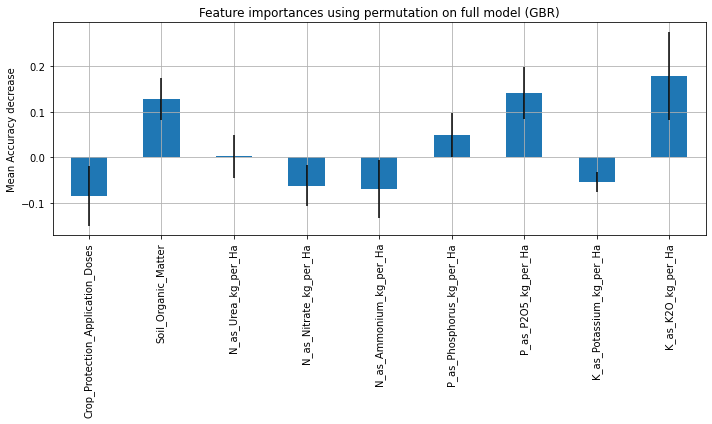

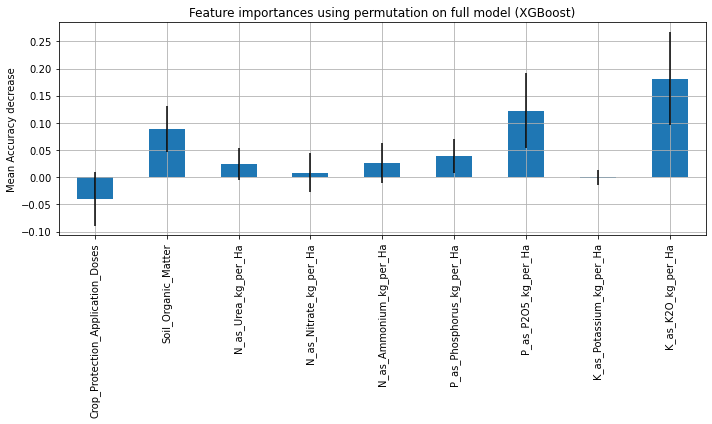

In [37]:
df_dy_wy_ratio_winter = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_dy_wy_ratio_winter.csv').drop(columns = 'Unnamed: 0')
run_feature_importance(df_dy_wy_ratio_winter)

## Feature Selection 2: Permutation Feature Importance Combining Parent Compounds

### Summer (All DY/WY Ratios Considered)

[18:51:52] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


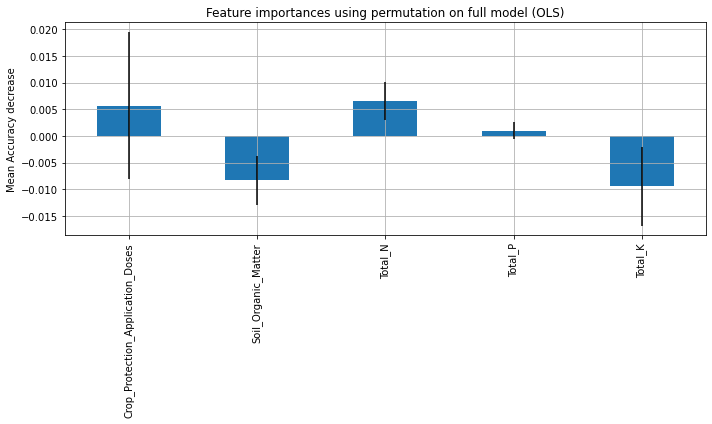

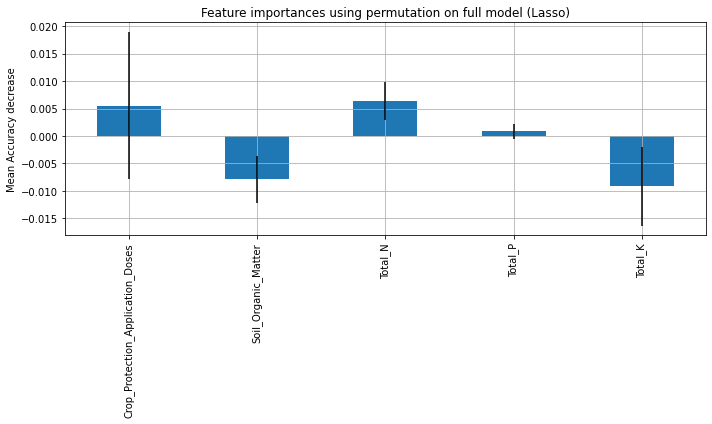

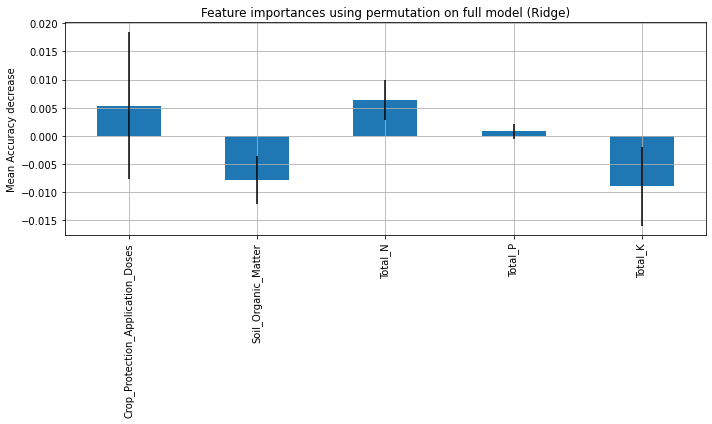

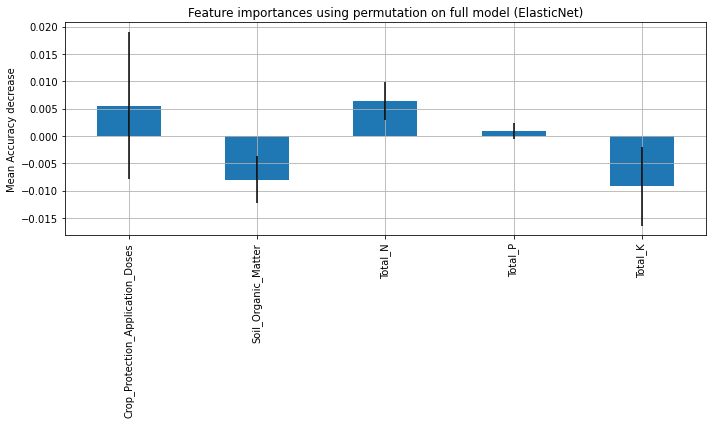

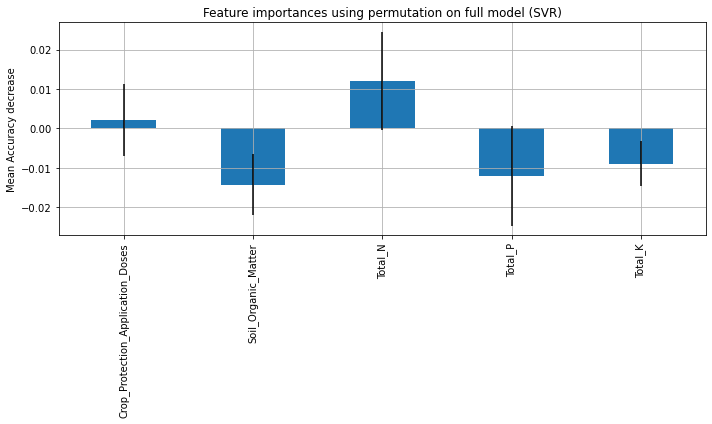

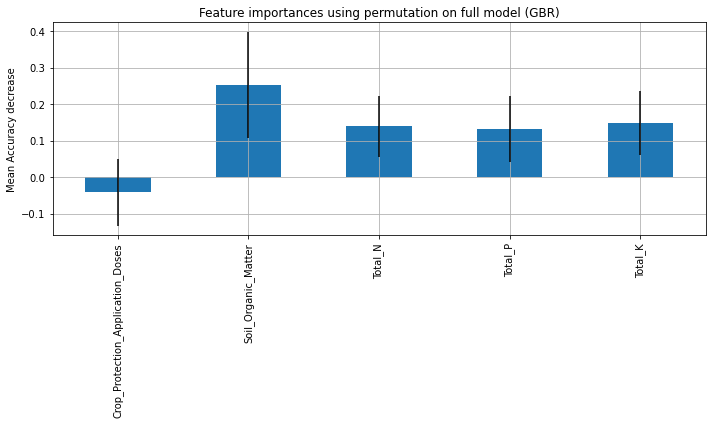

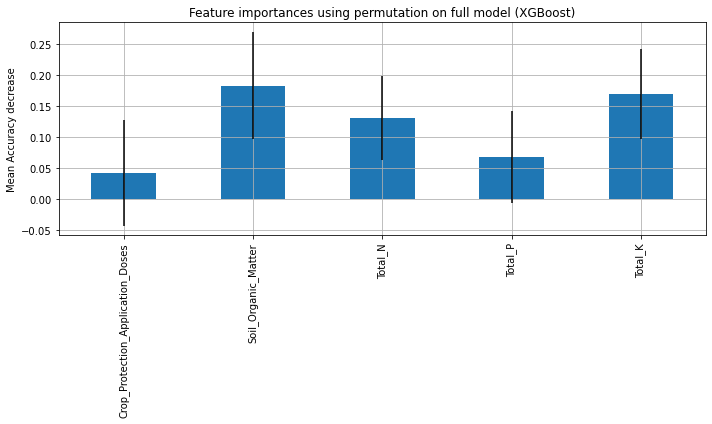

In [41]:
df_summer_combined_parents = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_summer_combined_parents.csv').drop(columns = 'Unnamed: 0')
run_feature_importance(df_summer_combined_parents)

### Winter (All DY/WY Ratios Considered)

[18:52:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


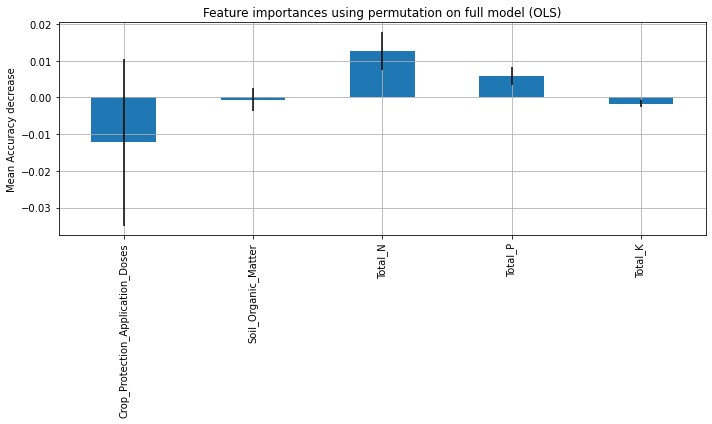

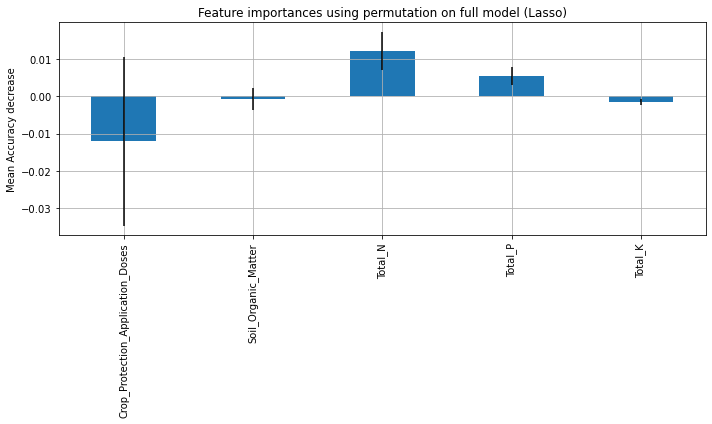

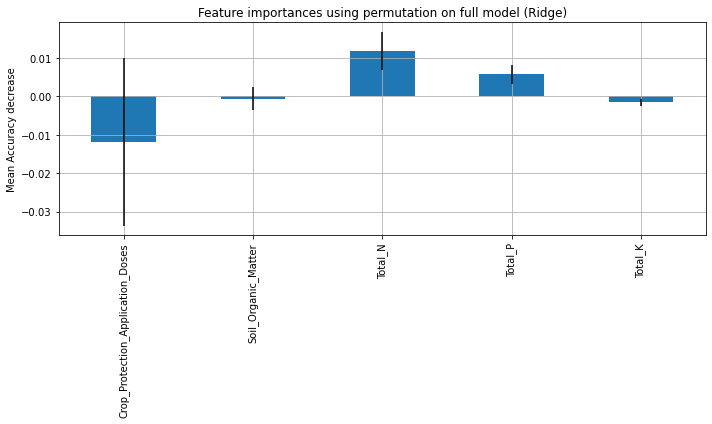

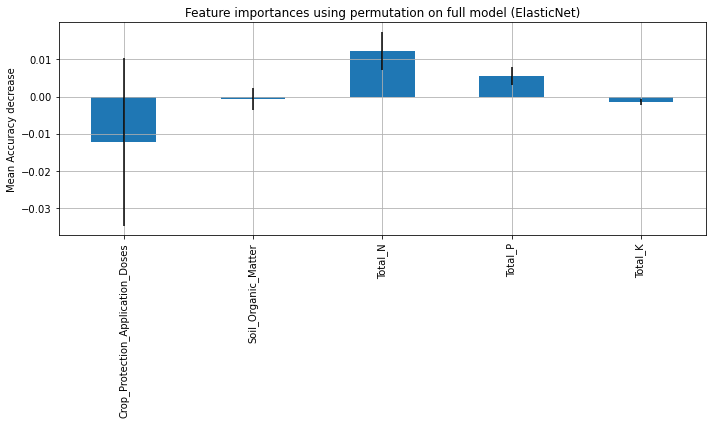

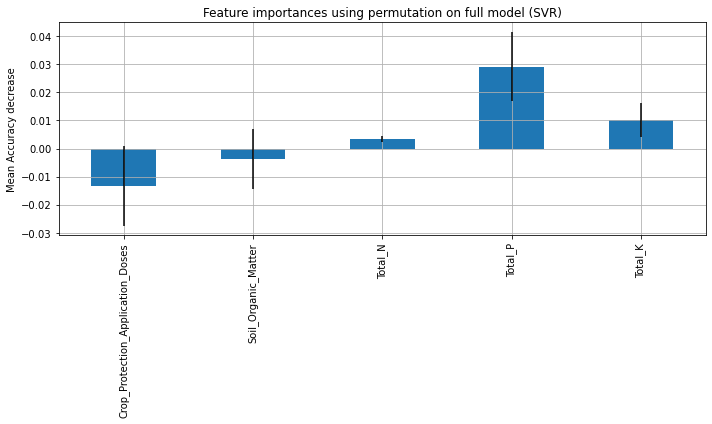

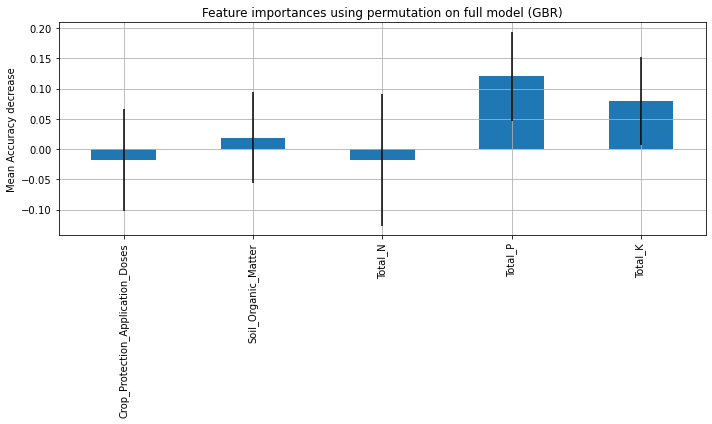

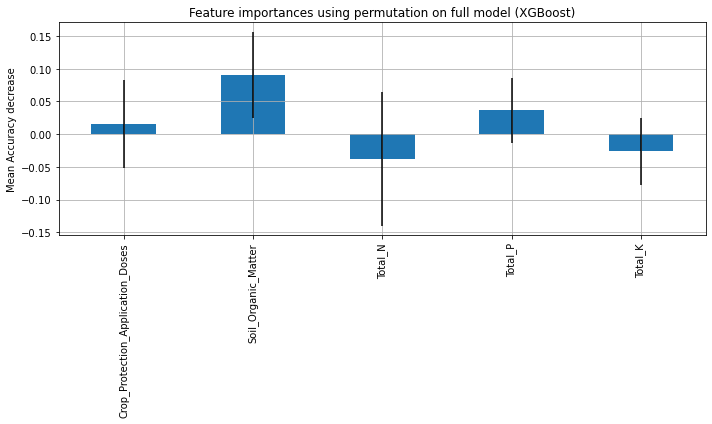

In [42]:
df_winter_combined_parents = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_winter_combined_parents.csv').drop(columns = 'Unnamed: 0')
run_feature_importance(df_winter_combined_parents)

### Summer (within Acceptable Dry/Wet Yield Ratio Range)

[18:52:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


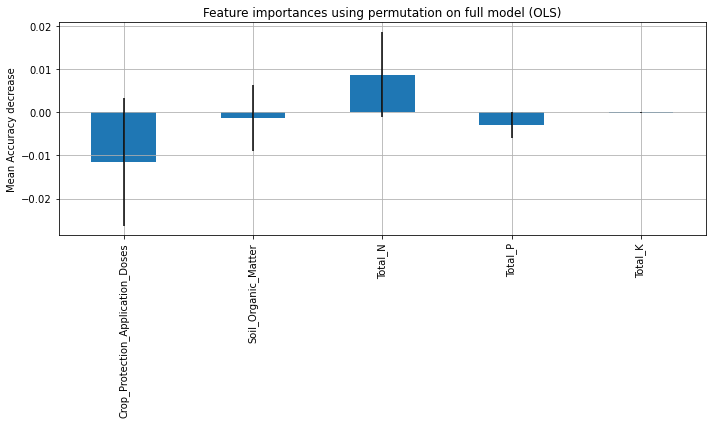

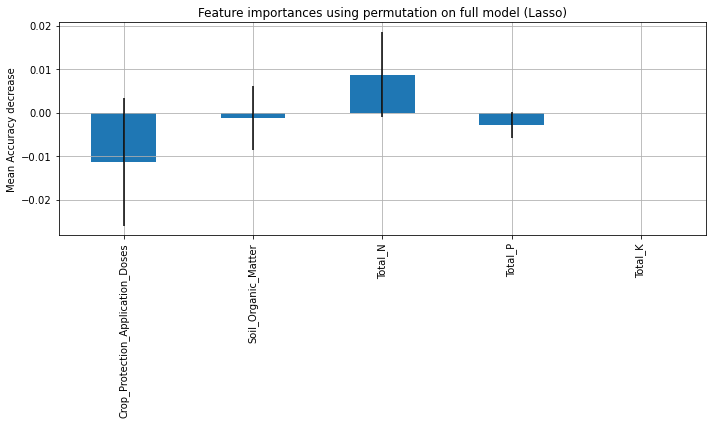

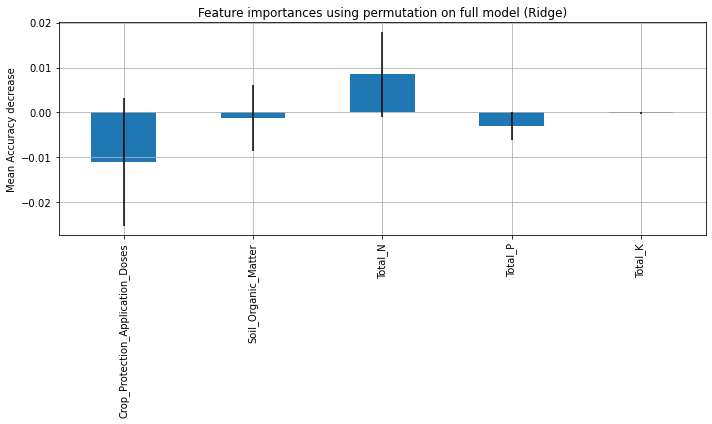

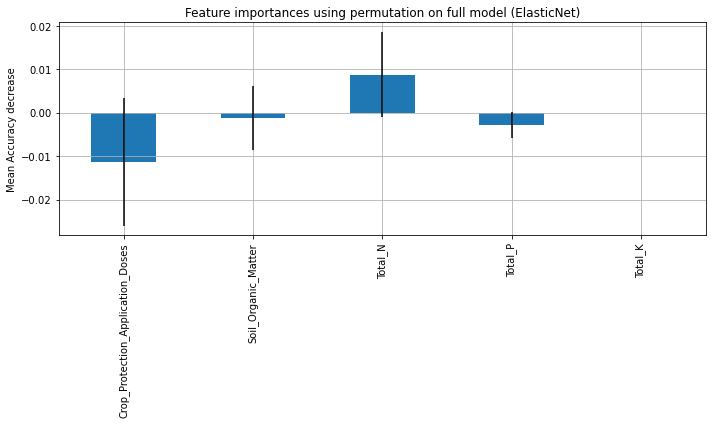

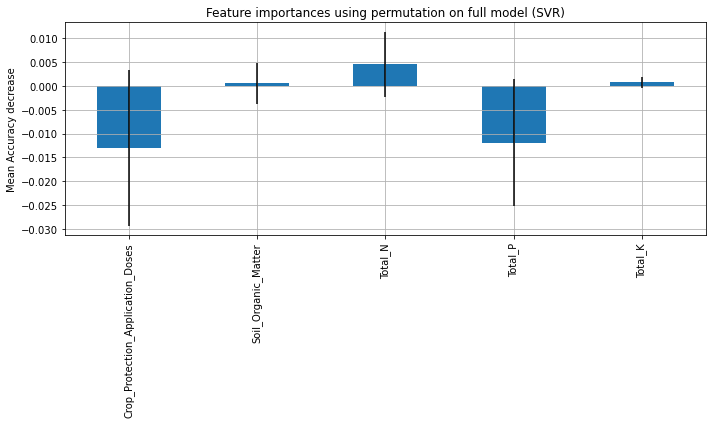

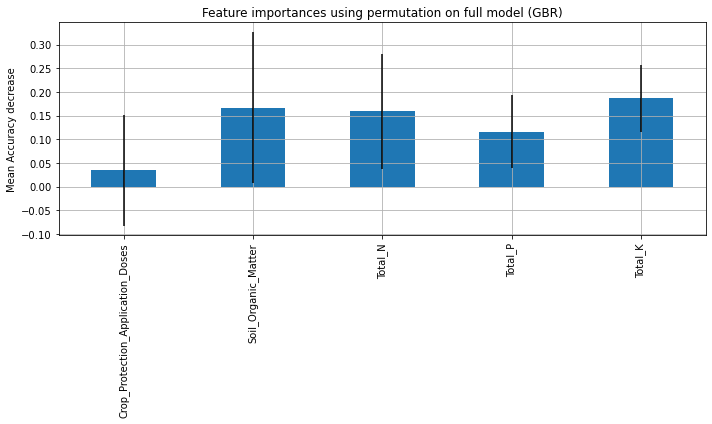

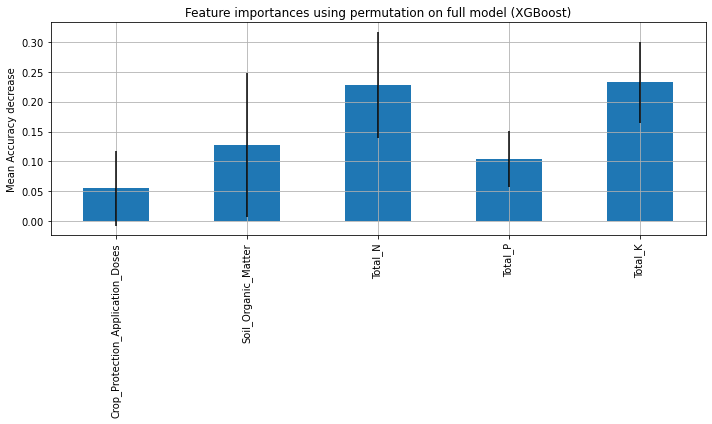

In [43]:
df_dy_wy_ratio_summer_combined_parents = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_dy_wy_ratio_summer_combined_parents.csv').drop(columns = 'Unnamed: 0')
run_feature_importance(df_dy_wy_ratio_summer_combined_parents)

### Winter (within Acceptable Dry/Wet Yield Ratio Range)

[18:53:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


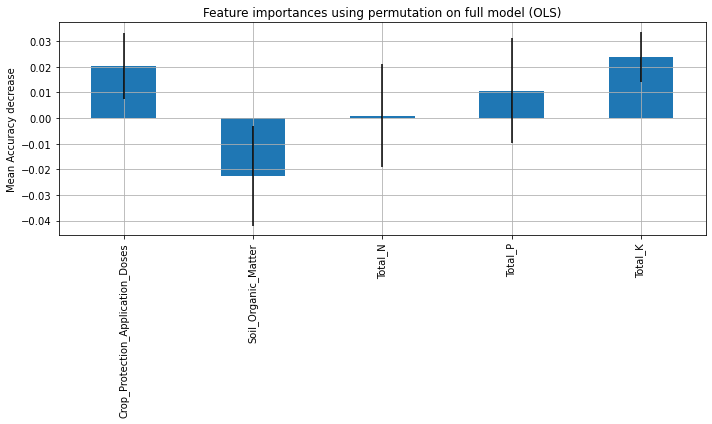

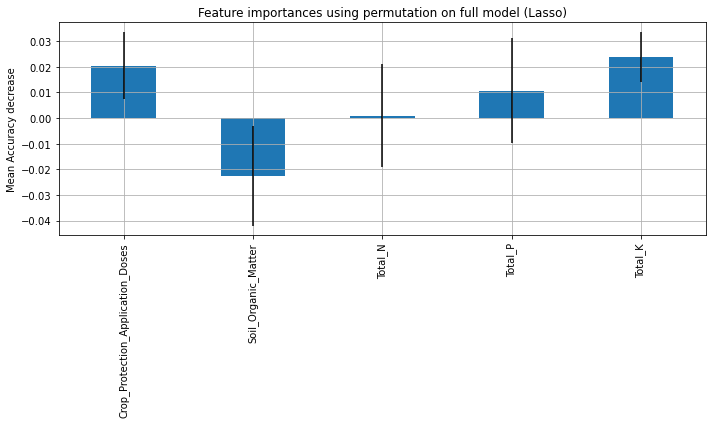

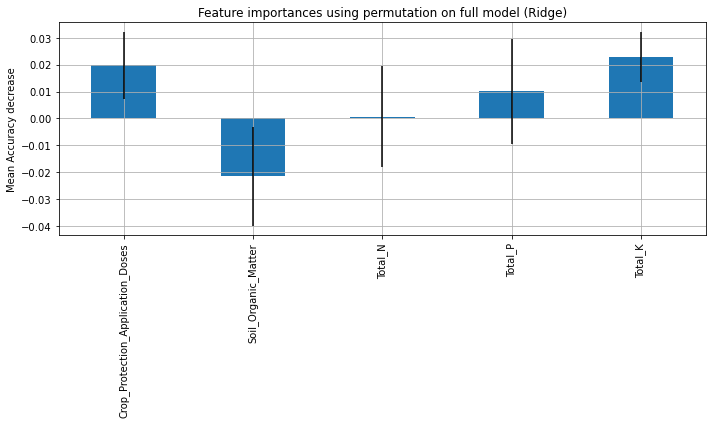

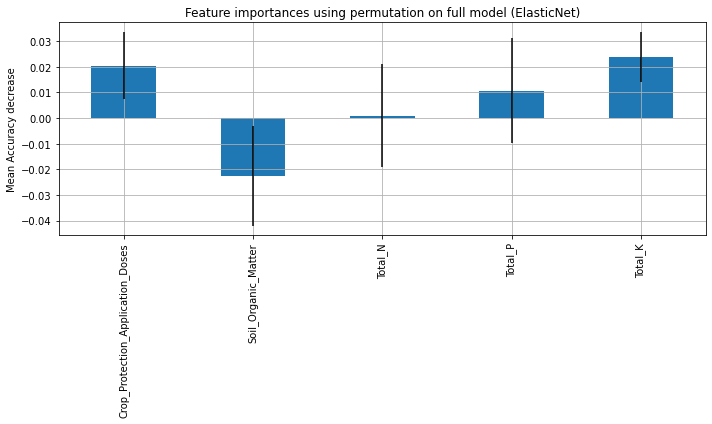

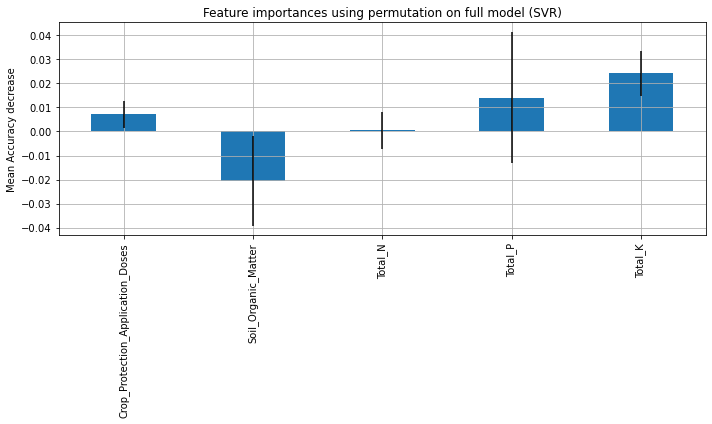

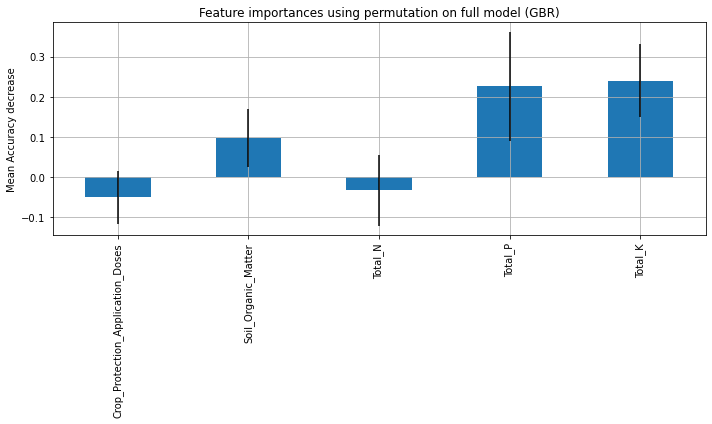

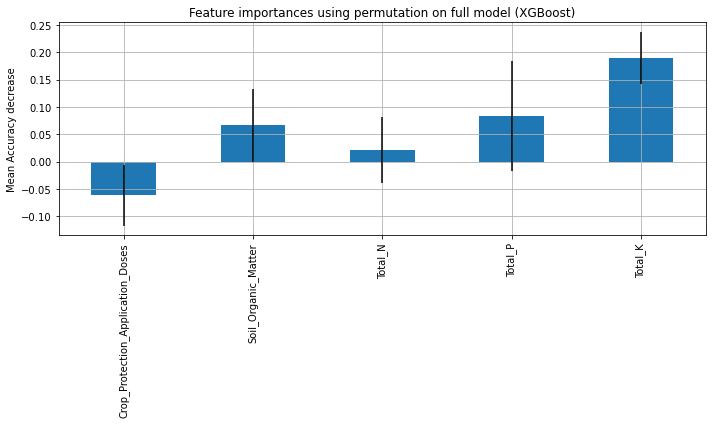

In [44]:
df_dy_wy_ratio_winter_combined_parents = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_dy_wy_ratio_winter_combined_parents.csv').drop(columns = 'Unnamed: 0')
run_feature_importance(df_dy_wy_ratio_winter_combined_parents)

### Feature Selection 3 (Prescription Dataset)

[15:43:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


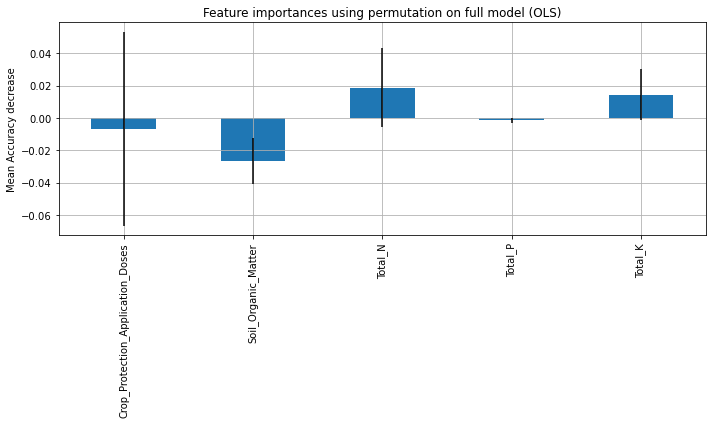

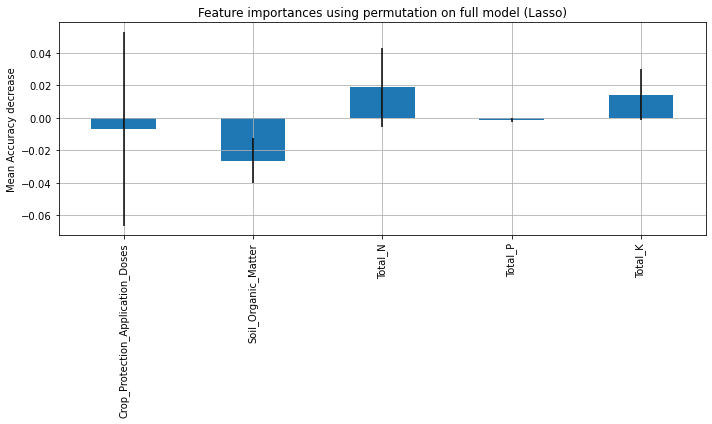

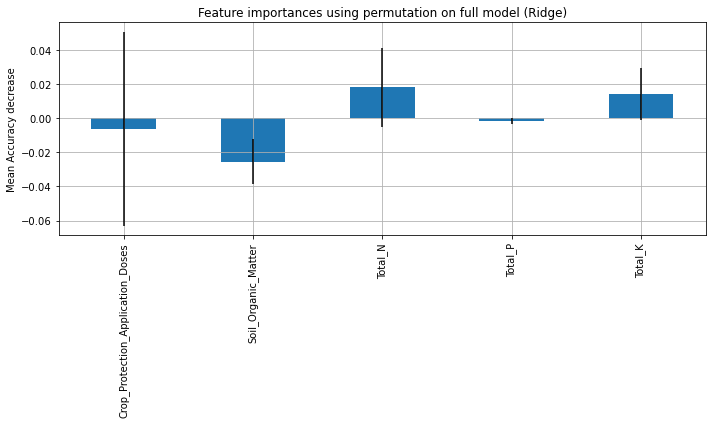

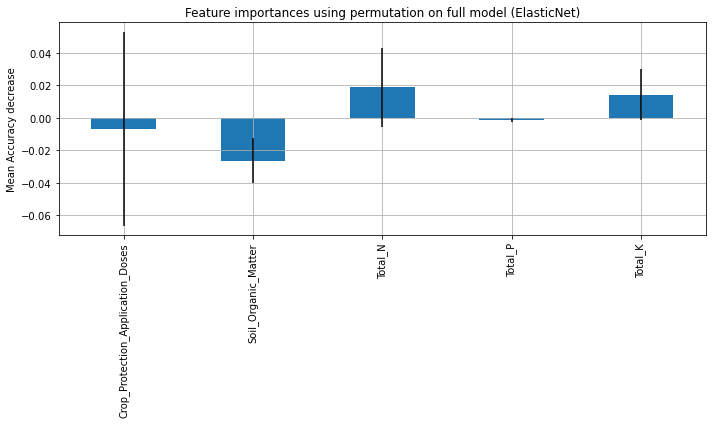

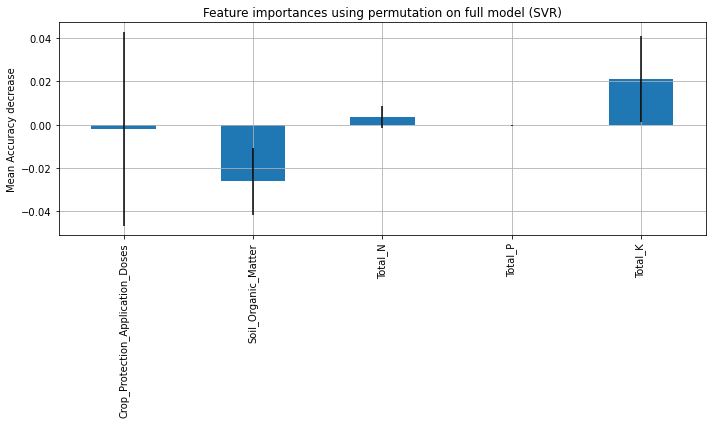

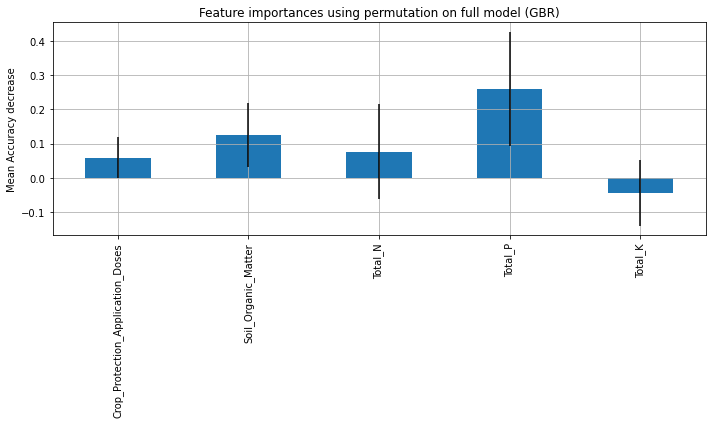

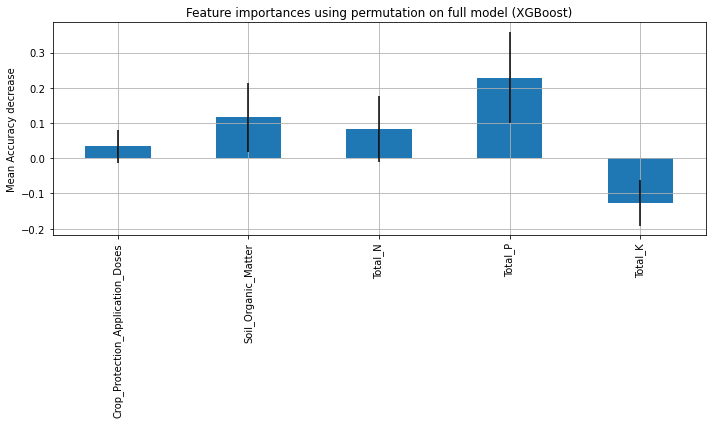

In [4]:
df_prescription = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/prescription_dataset.csv').drop(columns = 'Unnamed: 0')
run_feature_importance(df_prescription)